In [79]:
# load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
path_train = 'https://media.githubusercontent.com/media/Carloszone/ALY-6020/master/Week%202/mnist_train.csv'
path_test = 'https://media.githubusercontent.com/media/Carloszone/ALY-6020/master/Week%202/mnist_test.csv'

In [3]:
df_train = pd.read_csv(path_train, header=None)
df_test = pd.read_csv(path_test, header=None)

In [6]:
print(df_train.shape)
df_train.head()

(60000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(df_test.shape)
df_test.head()

(10000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# encode the target variable: 0: even, 1:odd
df_train[0] = df_train[0].apply(lambda x: 1 if x%2 ==1 else 0)
df_test[0] = df_test[0].apply(lambda x: 1 if x%2 ==1 else 0)

In [10]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# create two df to store odd and even records
train_odd = df_train.loc[df_train[0]==1,:]
train_even = df_train.loc[df_train[0]==0,:]

In [20]:
print(train_odd.shape)
train_odd.head()

(30508, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print(train_even.shape)
train_even.head()

(29492, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# accroding to the homework requirement, generate several dataframe for training
train_even300 = pd.concat([train_odd.sample(n=29700, random_state = 2021),
                          train_even.sample(n=300,random_state = 2021)],axis = 0).reset_index(drop = 1)

train_even3000 = pd.concat([train_odd.sample(n=27000, random_state = 2021),
                          train_even.sample(n=3000,random_state = 2021)],axis = 0).reset_index(drop = 1)

train_even6000 = pd.concat([train_odd.sample(n=24000, random_state = 2021),
                          train_even.sample(n=6000,random_state = 2021)],axis = 0).reset_index(drop = 1)

train_even12000 = pd.concat([train_odd.sample(n=18000, random_state = 2021),
                          train_even.sample(n=12000,random_state = 2021)],axis = 0).reset_index(drop = 1)

train_even15000 = pd.concat([train_odd.sample(n=15000, random_state = 2021),
                          train_even.sample(n=15000,random_state = 2021)],axis = 0).reset_index(drop = 1)


In [70]:
# create a function to do cross validation, train model, and report performance
def naive_bayes(data, model, pos_label = 0, k = 5):
    # create X and Y
    X = np.array(data.loc[:,1:])
    Y = np.array(data.loc[:,0])
    acc = []
    pre = []
    rec = []
    f1 = []
    res = {}
    
    # setting Kfold
    kf = KFold(n_splits = k, shuffle=True, random_state=2021)
    for train_index, test_index in kf.split(X):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, pred)
        precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, pos_label = pos_label, average = 'binary')
        
        acc.append(accuracy)
        pre.append(precision)
        rec.append(recall)
        f1.append(fscore)
    
    res['accuracy'] = np.mean(acc)
    res['precision'] = np.mean(pre)
    res['recall'] = np.mean(rec)
    res['f1score'] = np.mean(f1)
    
    return(res)
    
    

In [71]:
model = BernoulliNB()

In [73]:
# check the result for all datasets
datasets = [train_even300, train_even3000, train_even6000, train_even12000, train_even15000]

res = []
for data in datasets:
    res.append(naive_bayes(data, model))

In [76]:
# extract the metrics from result
acc = []
pre = []
rec = []
f1 = []
for result in res:
    acc.append(result['accuracy'])
    pre.append(result['precision'])
    rec.append(result['recall'])
    f1.append(result['f1score'])

In [93]:
# create a dataframe to store result

even_num = ['even300', 'even3000', 'even6000', 'even12000', 'even15000']

result = pd.DataFrame({
    'even_number':even_num,
    'accuracy': acc,
    'precision': pre,
    'recall': rec,
    'F1score':f1
})

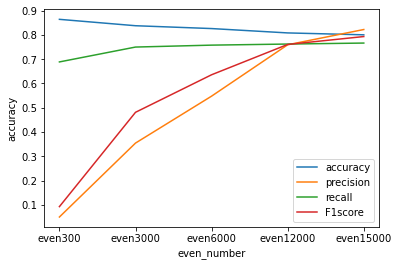

In [95]:
# draw a plot
sns.lineplot(x ='even_number', y = 'accuracy', data = result)
sns.lineplot(x ='even_number', y = 'precision', data = result)
sns.lineplot(x ='even_number', y = 'recall', data = result)
sns.lineplot(x ='even_number', y = 'F1score', data = result)
plt.legend(labels=['accuracy', 'precision', 'recall', 'F1score'])

In [96]:
result

,even_number,accuracy,precision,recall,F1score
0,even300,0.864533,0.049519,0.688950,0.092351
1,even3000,0.838200,0.354362,0.750241,0.481221
2,even6000,0.826500,0.547912,0.758171,0.636047
3,even12000,0.808533,0.759666,0.762653,0.761046
4,even15000,0.800700,0.822568,0.766719,0.793574
